In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

credit_df = pd.read_csv("Credit_card.csv")
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [49]:
label_df = pd.read_csv("Credit_card_label.csv")
label_df.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [50]:
credit_df = pd.merge(credit_df, label_df, on = "Ind_ID", how = "outer")
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,1,0,0,0,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,1,0,0,0,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,1,0,0,0,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,1,0,0,1,NaN,4,0


# #1

In [94]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

credit_df["Annual_income"] = credit_df["Annual_income"].fillna(credit_df["Annual_income"].median())
credit_df["GENDER"] = class_labels.fit_transform(credit_df["GENDER"].values)
credit_df["Car_Owner"] = class_labels.fit_transform(credit_df["Car_Owner"].values)
credit_df["Propert_Owner"] = class_labels.fit_transform(credit_df["Propert_Owner"].values)
credit_df["Marital_status"] = class_labels.fit_transform(credit_df["Marital_status"].values)

# New changes
credit_df["EDUCATION"] = class_labels.fit_transform(credit_df["EDUCATION"].values)
credit_df["Housing_type"] = class_labels.fit_transform(credit_df["Housing_type"].values)
credit_df["Type_Income"] = class_labels.fit_transform(credit_df["Type_Income"].values)
credit_df["Type_Occupation"] = class_labels.fit_transform(credit_df["Type_Occupation"].values)
credit_df["Birthday_count"] = credit_df["Birthday_count"].fillna(credit_df["Birthday_count"].median())
# I had to make all non-numeric values into numerical values in order to undersample the data
# You can not undersample/oversample strings because you don't know how many strings or what the strings are to be compared to.

credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,18,2,1
1,5008865,0,1,1,2,135000.0,3,4,1,1,-15761.0,-3173,1,0,0,0,8,4,0
2,5008889,0,0,1,0,247500.0,0,1,2,4,-17016.0,-1347,1,0,0,0,3,1,0
3,5009000,1,1,1,0,157500.0,3,4,1,1,-9927.0,-828,1,0,0,0,4,2,0
4,5009023,0,0,1,2,216000.0,2,1,1,1,-15444.0,-3112,1,0,0,1,18,4,0


In [52]:
credit_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [53]:
credit_df["label"].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

# Oversampling

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = credit_df.drop("label", axis = 1)
y = credit_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [56]:
model = LogisticRegression(random_state = 42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [57]:
y_pred = model.predict(X_test)

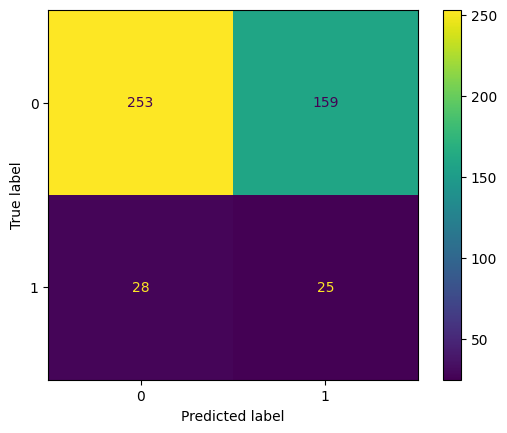

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

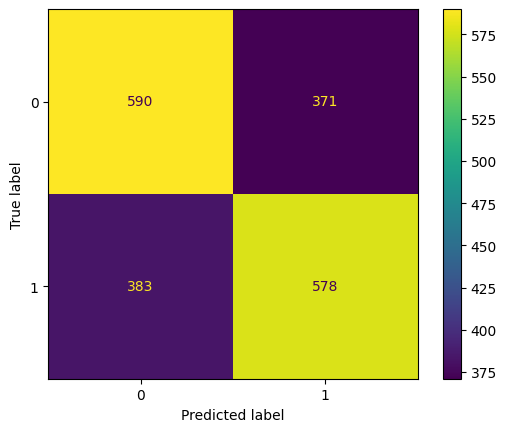

In [59]:
ConfusionMatrixDisplay.from_estimator(model, X_resampled, y_resampled)

In [77]:
# Recall
578 / (578 + 383)

0.6014568158168574

# Undersampling

In [61]:
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state = 42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [62]:
model = LogisticRegression(random_state = 42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [63]:
y_pred = model.predict(X_test)

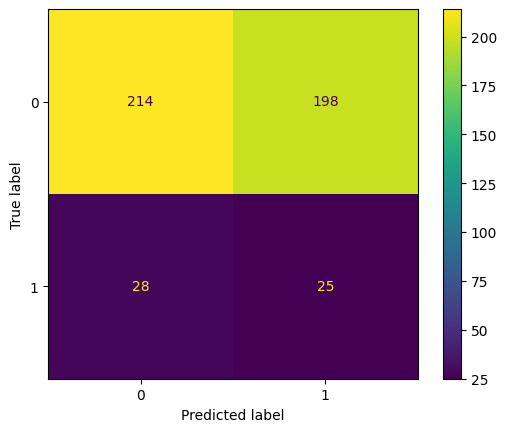

In [64]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

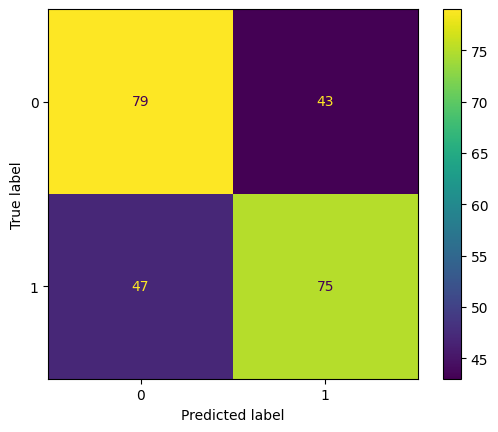

In [65]:
ConfusionMatrixDisplay.from_estimator(model, X_resampled, y_resampled)

In [66]:
# Recall
75 / (75 + 47)

0.6147540983606558

I chose undersampling because it ended up producing a lower recall than oversampling. Also, reducing the amount of people who aren't approved to somewhat match the people who are approved will produce more people getting approved. If it were oversampling, it would inflate the amount of people that will get approved.

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0]


In [68]:
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.864516129032258


In [69]:
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0]


In [70]:
knn_score = knn.score(X_resampled, y_resampled)
print(knn_score)

0.7704918032786885


It seems that undersampling the data has caused KNN score to drop. This may be due to the fact that it has to reduce the amount of people that are rejected to get a credit card.

# Linear Regression

In [71]:
from sklearn.linear_model import LogisticRegression

X = credit_df.drop("label", axis = 1)
y = credit_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [72]:
regression = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
regression.score(X_test, y_test)

0.8870967741935484

In [74]:
regression = LogisticRegression(random_state = 42).fit(X_resampled, y_resampled)
y_pred = regression.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [75]:
regression.score(X_test, y_test)

0.5225806451612903

The regression score defintely dropped a lot. There seems to be little correlation compared to the data not being undersampled. The undersampled data may have caused the number of people to be approved for a credit card to increase. The majority group, people who can't be approved, was reduced to match the amount of people were approved.

# #3

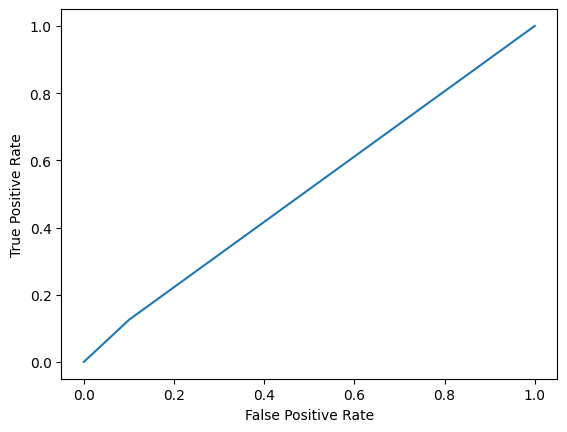

In [83]:
from sklearn import metrics

def plot_roc_curve(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
plot_roc_curve(y_pred, y_test)

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test)
print(metrics.auc(fpr, tpr))

0.5196465740622744


# #4

In [91]:
from sklearn.svm import SVC

classifier = SVC(kernel = "linear")

classifier.fit(X_resampled, y_resampled)

SVC(kernel='linear')

In [92]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [93]:
classifier.score(X_test, y_test)

0.5741935483870968

The SVM model did better than the Linear Regression, but worse than the KNN. SVM seperated the datapoints into different classes. From there, it uses a hyperplane optimally to find out the margin between the classes. The undersampling limits how far the datapoints are from each other in different classes.

# #5
Outlier detection is when there are certain data points that seem out of the ordinary compared to the rest of the data. They are basically outliers. This can cause problems because they can positively or negatively skew the data set. It can make the data seem what it is not like. A real life example could be is when detecting bank fraud. If a program notices irregular spending patterns compared to it normally, it would recognize the irregular spending patterns as an outlier. This is outlier then can be recognized as fraud. A way to detect outliers is to make a box plot of the data set. It can help detect noticeable outliers in the data set whether it is the minimum or maximum.